**Dataset**
labeled dataset collected from twitter (Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>

**Evaluation metric**
macro f1 score

**Steps**

To classify hate speech in tweets, follow these key steps:

1. **Data Preprocessing**: Clean text (remove punctuation, stopwords, etc.), lowercase, tokenize, and so on.
2. **Text Representation**: Use Bag of Words, TF-IDF, or word embeddings (e.g., GloVe, Word2Vec, or FastText).
3. **Modeling Approaches**:
   - **Traditional Models**: Logistic Regression, Naive Bayes, SVM, Random Forest.
   - **Deep Learning**: LSTM or RNN.
4. **Evaluation**
5. **Optimization**: Use hyperparameter tuning, regularization, and ensemble methods for better performance.


### Import used libraries

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

###### Note: search how to load the data from tsv file

In [2]:
df = pd.read_csv("Hate Speech.tsv", sep= "\t")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label']) # stratify the label column to ensure equal distribution of classes in both train and test set
print(f"Train set size: {len(train)}, Test set size: {len(test)}")

Train set size: 25228, Test set size: 6307


### EDA on training data

- check NaNs

In [9]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

- check duplicates

In [10]:
train.duplicated().sum()

0

- show a representative sample of data texts to find out required preprocessing steps

In [18]:
print("Sample of training data texts:")
print(train['tweet'].sample(10, random_state=42))

Sample of training data texts:
25907                                                                                                               #girls cum on #face
7470                                               these hoes miserable so they go out their way to try to make somebody else miserable
17509                                                                                                cheese and crackers for dinner amp
14920    @user @user they should be cancelled/moved but they won't.  it is too late...too much $$$ lost to big wigs.  games will go on.
5757                                              #auditions #shopping @ #laminiatura #saltandstraw #pooltime #beginning of summer  â¦
3923                                @user found a shitload of cool #graffiti  pieces in cool #stockholm.   check:  later for all....â¦
28128                                                                                    yes!! do it to it!! ððªðð   #monday
3206             

- check dataset balancing

In [21]:
# Check class distribution
class_distribution = train['label'].value_counts(normalize=True)
print("Class distribution in training data:")
print(class_distribution)

Class distribution in training data:
label
0    0.92984
1    0.07016
Name: proportion, dtype: float64


The class distribution indicates a significant imbalance, with about 93% of tweets labeled as non-hate speech (0) and only 7% as hate speech (1).
metrics like: 
- precision 
- recall 
- F1-score *(specifically, the macro F1-score)* 

**Are more suitable for imbalanced datasets.**


- Cleaning and Preprocessing are:
    - 1 **remove punctuation** (generally do not carry semantic meaning for text classification)
    - 2 **remove stopwords** (common words that do not carry much information)
    - 3 **remove URLs** (do not carry semantic meaning for text classification)
    - 4 **remove mentions** ( eg. @username do not carry semantic meaning for text classification)
    - 5 **remove hashtags** (Hashtags are often used to categorize tweets, but they can introduce irrelevant information)
    - 6 **lemmatization** (reduce words to their base or root form)
    - 7 **lowercasing** (convert all text to lowercase to ensure uniformity)
    - 8 **tokenization** 

### Cleaning and Preprocessing

#### Use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class CustomTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, parameter1, parameter2):
#         self.parameter1 = parameter1
#         self.parameter2 = parameter2
        
#         # Add any initialization code here
    
#     def fit(self, X, y=None):
#         # Add code for fitting the transformer here
#         return X
    
#     def transform(self, X):
#         # Add code for transforming the data here
#         transformed_X = X.copy()  # Example: Just copying the data
        
#         # Example transformation
#         transformed_X['feature1'] = transformed_X['feature1'] * self.parameter1
#         transformed_X['feature2'] = transformed_X['feature2'] * self.parameter2
        
#         # Do all the needed transformations and data preprocessing here
        
#         return transformed_X
    
#     def fit_transform(self, X, y=None):
#         # This function combines fit and transform
#         self.fit(X, y)
#         return self.transform(X)

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ziad.abdlhamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziad.abdlhamed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ziad.abdlhamed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ziad.abdlhamed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
from sklearn.base import BaseEstimator, TransformerMixin
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(self.clean_text)
    
    def clean_text(self, text):
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'#', '', text)  # Remove hashtags
        text = text.lower()  # Convert to lowercase
        tokens = word_tokenize(text)  # Tokenize the text
        tokens = [word for word in tokens if word not in self.stop_words]  # Remove stopwords
        tokens = [self.lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize the text
        return ' '.join(tokens)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)


**You  are doing Great so far!**

### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

In [179]:
# from sklearn.pipeline import Pipeline

# model = LogisticRegression()

# # Create the pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessing', CustomTransformer()),
#     ('Vectorizing', Vectorizer()),
#     ('model', model),
# ])

# # Now you can use the pipeline for training and prediction
# # pipeline.fit(X_train, y_train)
# # pipeline.predict(X_test)

In [207]:
from gensim.models import Word2Vec
import numpy as np
class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=200, min_count=1, window=3):
        self.size = size
        self.min_count = min_count
        self.window = window
    
    def fit(self, X, y=None):
        tokenized_texts = [word_tokenize(text) for text in X]
        self.model = Word2Vec(sentences=tokenized_texts, vector_size=self.size, min_count=self.min_count, window=self.window)
        return self
    
    def transform(self, X):
        return np.array([self.vectorize_text(text) for text in X])
    
    def vectorize_text(self, text):
        tokens = word_tokenize(text)
        vectors = [self.model.wv[word] for word in tokens if word in self.model.wv]
        return np.mean(vectors, axis=0) if vectors else np.zeros(self.size)

In [208]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, max_depth=7, learning_rate=0.1, random_state=42)

**XGBoost** often handle imbalance well, so it is a good choice for starting with.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', TextPreprocessor()),   # Step 1: Text cleaning
    ('vectorizing', Word2VecVectorizer()),      # Step 2: Text vectorization
    ('model', model)                         # Step 3: Classification model
])

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [210]:
# Fit the pipeline on the training data
pipeline.fit(train['tweet'], train['label'])

# Make predictions on the test data
y_pred = pipeline.predict(test['tweet'])

# Evaluate model performance
print(classification_report(test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5864
           1       0.78      0.22      0.35       443

    accuracy                           0.94      6307
   macro avg       0.86      0.61      0.66      6307
weighted avg       0.93      0.94      0.93      6307



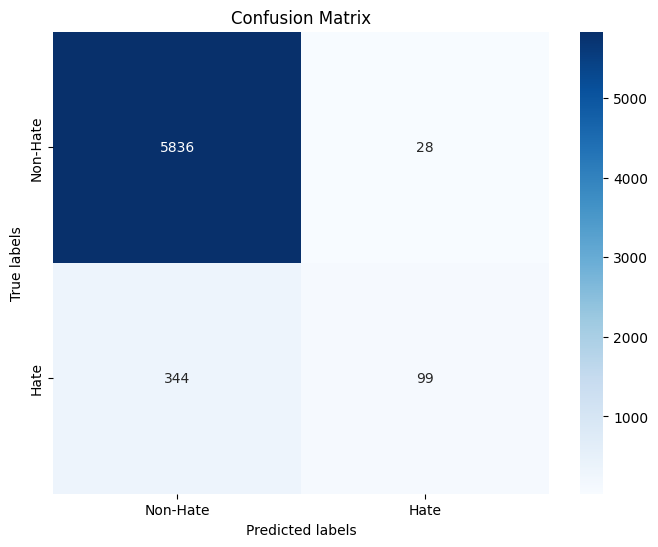

In [211]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(test['label'], y_pred)

The XGBoost model performs exceptionally well on the `Non-Hate` class but has moderate recall on the `Hate` class, suggesting that it struggles with detecting hate speech. Improvements in handling class imbalance , fine-tuning parameters for "Hate" sensitivity might enhance performance on the minority class.

### Enhancement

- Using different text representation or modeling techniques
- Hyperparameter tuning

In [201]:
# Calculate the scale_pos_weight
neg_class = sum(train['label'] == 0)
pos_class = sum(train['label'] == 1)
scale_pos_weight = (neg_class / pos_class)/2
print(f"Scale_pos_weight: {scale_pos_weight}")


Scale_pos_weight: 6.626553672316384


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Update the model with the scale_pos_weight
model = XGBClassifier(n_estimators=1000, max_depth=7, learning_rate=0.1, random_state=42, scale_pos_weight=scale_pos_weight)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', TextPreprocessor()),   # Step 1: Text cleaning
    ('vectorizing', TfidfVectorizer()),      # Step 2: Text vectorization
    ('model', model)                         # Step 3: Classification model
])

In [213]:
# Fit the pipeline on the training data
pipeline.fit(train['tweet'], train['label'])

# Make predictions on the test data
y_pred = pipeline.predict(test['tweet'])

# Evaluate model performance
print(classification_report(test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5864
           1       0.73      0.63      0.68       443

    accuracy                           0.96      6307
   macro avg       0.85      0.81      0.83      6307
weighted avg       0.96      0.96      0.96      6307



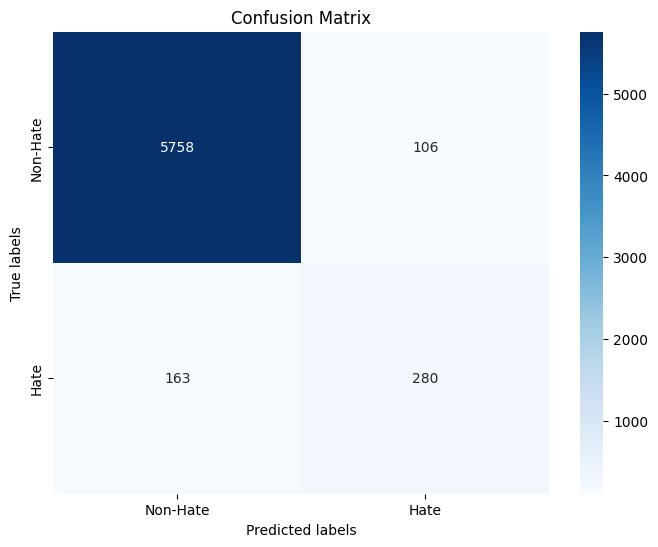

In [214]:
plot_confusion_matrix(test['label'], y_pred)

### Conclusion and final results

I applied the **scale_pos_weight** parameter and switched from **Word2VecVectorizer** to **TfidfVectorizer** to address class imbalance and improve feature representation for the classification task. These adjustments led to a substantial improvement in the model’s performance on the minority `Hate` class.

- **Recall for the `Hate` class** improved significantly, from **0.22** to **0.63**, indicating that the model captures more true hate instances.
- **Precision for the `Hate` class** dropped slightly from **0.78** to **0.73**, but this trade-off is balanced by the increase in recall.
- **Macro average F1-score** increased from **0.66** to **0.83**, showing more balanced performance across both classes.

The use of **scale_pos_weight** increased sensitivity to the minority class, while **TfidfVectorizer** highlighted rare, meaningful words, improving overall classification. Together, these enhancements boosted the model’s ability to detect hate speech without compromising accuracy.

#### Done!

In [228]:
import pandas as pd
def predict_single_sentence(sentence):
    sentence_series = pd.Series([sentence])
    prediction = pipeline.predict(sentence_series)[0]
    if prediction == 1:
        print ("Hate Speech")
    else:
        print("Non-Hate Speech")

In [229]:
predict_single_sentence("you are idiot")

Hate Speech


In [230]:
predict_single_sentence("i love you")

Non-Hate Speech
